## ICT233 Data Programming January 2023 Semester End-Of-Course (ECA)

### Question 1

**Objectives:**
+ Understand dataset with Data Scientist mindset.
  
+ Exposure to real-world dataset analysis.
  
+ Understand and design computation logic and routines in Python.
  
+ Assess use of Pandas and Dataframes to perform extract, load, transformation and calculation operations.

+ Assess the Design and use of Database method to perform create and load operations.

+ Conduct visualization in an appropriate way.
  
+ Structure code in appropriate methods (functions), looping and conditions.

The dataset **titanic.csv** contains a set of on-board passengers. Each row represents one passenger with the below information in Table 1:

**Variable: &nbsp;&nbsp; Definition**

+ Survived: &nbsp;&nbsp; Whether the passenger survived or not: 0 = No, 1 = Yes
  
+ Pclass: &nbsp;&nbsp; Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd. A proxy for socio-economic status
  
+ Sex: &nbsp;&nbsp; male, female
  
+ Age: &nbsp;&nbsp; Age in years
 
+ SibSp: &nbsp;&nbsp; The number of siblings / spouses onboard

+ Parch: &nbsp;&nbsp; The number of parents / children onboard

+ Ticket: &nbsp;&nbsp; Ticket number
  
+ Fare: &nbsp;&nbsp; Passenger fare

+ Cabin: &nbsp;&nbsp; Cabin number

+ Embarked: &nbsp;&nbsp; Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

+ Name: &nbsp;&nbsp; Passenger name

### Question 1(a)     (3 marks)

Load the dataset into a dataframe and identify fields contain missing data. Drop fields with more than 50% rows of missing values.

In [1]:
""" The 1st thing to do is import the pandas library and give it an alias of pd. """
import pandas as pd 

# Todo 1. Store the csv file into a dataframe

print("'titanic.csv: ")
titanic_df = pd.read_csv(filepath_or_buffer = 'titanic.csv', sep = ',')             # Read the titanic csv file

titanic_df_copy = titanic_df.copy()      # Save a copy of the titanic Dataframe

display(titanic_df_copy.head())         # titanic.csv

print("\n")


# Todo 2. Define the columns that contain empty values
# titanic_df_copy = titanic_df_copy.columns  # Call the 'columns' attribute on the Dataframe to show the column labels  
# display(titanic_df_copy.columns)
""" Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') """

empty_values = titanic_df_copy.columns[titanic_df_copy.isnull().any()]        # Filter the 'titanic_df_copy' Dataframe for null values by using the 'isnull()' to return all the values are replaced with a Boolean value True for NULL values, and otherwise False.  

# Also chain the any() to check if any element in the Dataframe is True

# display(empty_values)
# Index(['Age', 'Cabin', 'Embarked'], dtype='object')

print("\n")

empty_values = empty_values.to_list()       # We will now convert the index object into a list object using 'to_list()'

# display(empty_values)       # In the list we can see that the 3 columns are the columns that contain empty values
# ['Age', 'Cabin', 'Embarked']


# Todo 3: Remove columns that have more than 50% rows of empty values.

Total_num_titanic_values = len(titanic_df_copy)       # 891 is the total number of elements in the Dataframe

sum_empty_values = titanic_df_copy.isnull().sum()   # Use 'isnull()' on the Dataframe to return all the values are replaced with a Boolean value True for NULL values, and otherwise False.

# Then calculate the total number of values in each column in the Dataframe using sum()

# display(sum_empty_values.reset_index())
""" 
    index	        0
0	PassengerId	    0
1	Survived	    0
2	Pclass	        0
3	Name	        0
4	Sex	            0
5	Age	            177 """

missing_values = sum_empty_values / Total_num_titanic_values        # Use this equation to get the missing values result

# display(missing_values.reset_index())
""" 
    index	        0
0	PassengerId	    0.000000
1	Survived	    0.000000
2	Pclass	        0.000000
3	Name	        0.000000
4	Sex	            0.000000
5	Age	            0.198653 """

missing_percent_values = missing_values * 100       # Get the missing values percentage by * 100 the missing values results

# display(missing_percent_values.reset_index())
""" 
    index	        0
0	PassengerId	    0.000000
1	Survived	    0.000000
2	Pclass	        0.000000
3	Name	        0.000000
4	Sex	            0.000000
5	Age	            19.865320 """

missing_percent_values = missing_percent_values.rename('Missing_Values_Percentage')
print("Calculate the percentage of missing values in each column: ")
display(missing_percent_values.reset_index())
print("\n")


# Todo 4: Define columns with greater than 50% missing values
columns_to_drop = missing_percent_values[missing_percent_values > 50]

# display(fields_to_drop.reset_index())
""" 
	index	Missing_Values_Percentage
0	Cabin	77.104377 """

columns_to_drop = columns_to_drop.index     # Call the 'index' attribute on the 'columns_to_drop' series to get the index labels
# display(columns_to_drop)
""" Index(['Cabin'], dtype='object') """

columns_to_drop = columns_to_drop.to_list()     # Store the index label into a list
# display(columns_to_drop)        # ['Cabin']


# Todo 5: Remove the column from the Dataframe
titanic_df_dropped = titanic_df_copy.drop(labels = columns_to_drop, axis=1)      # Remove the index label from the Dataframe and perform the drop() on the column axis

# Show the updated Dataframe
print("DataFrame after removing columns:")
display(titanic_df_dropped.head())

'titanic.csv: 


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S





Calculate the percentage of missing values in each column: 


index  Missing_Values_Percentage
0   PassengerId                   0.000000
1      Survived                   0.000000
2        Pclass                   0.000000
3          Name                   0.000000
4           Sex                   0.000000
5           Age                  19.865320
6         SibSp                   0.000000
7         Parch                   0.000000
8        Ticket                   0.000000
9          Fare                   0.000000
10        Cabin                  77.104377
11     Embarked                   0.224467



DataFrame after removing columns:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

### Question 1(b)       (2 marks)
Compute the average survival rate.

In [2]:
# Show the updated Dataframe
print("DataFrame after removing columns:")
display(titanic_df_dropped.head())

print("\n")

# Todo 1. Obtain the survival values from the Survived column
survival_values = titanic_df_dropped['Survived']      # Get the survival rate by selecting the 'Survived' column from the Dataframe
# print("survival_rate: ")
# display(survival_values.reset_index())
""" 
    index	Survived
0	0	    0
1	1	    1
2	2	    1
3	3	    1
4	4	    0 """


# Todo 2. Calculate the average survival rate by using mean     
average_survival_rate = survival_values.mean()      # Use the mean() on the Series to get the average value of all the vales in the Series

# print(average_survival_rate)        # 0.3838383838383838

print(f"Mean/Average survival rate: {average_survival_rate}")

DataFrame after removing columns:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S



Mean/Average survival rate: 0.3838383838383838


### Question 1(c)   (4 marks)
Perform visualisation `Sex` and `Pclass` using 2 separate pie charts.

DataFrame after removing columns:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

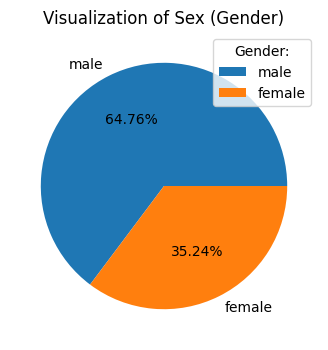

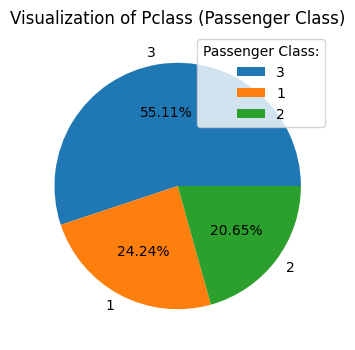

In [3]:
""" Need to include this line so that the plots show up in Jupyter Notebook """
%matplotlib inline
import matplotlib.pyplot as plt

# Show the updated Dataframe
print("DataFrame after removing columns:")
display(titanic_df_dropped.head())

print("\n")


# Visualize the 'Sex' column using a pie chart

# Todo 1. Access the Elements in the Sex column and count the number of elements the column
sex_count = titanic_df_dropped['Sex'].value_counts()
# display(sex_count.reset_index())
""" 
    index	Sex
0	male	577
1	female	314 """


# Todo 2. Get the index labels from the series and store the labels into a list
sex_labels = sex_count.index # Call the 'index' attribute on the 'sex_count' series to get the index labels
# display(sex_labels)
""" Index(['male', 'female'], dtype='object') """

sex_labels = sex_labels.tolist()      # Store the index label into a list

# display(gender_labels)
# ['male', 'female']


# Todo 3. Get a list of gender values for each sex
sex_count = sex_count.values      # Use the values attribute on the Series to get the Series values into an array
# display(gender_count)
# array([577, 314])

sex_count = sex_count.tolist()        # Convert the array into a list

# display(sex_count)

# Todo 4. Create the Sex Piechart
plt.figure(figsize=(4, 4))      # Use the figsize attribute to change the figure size 

plt.pie(sex_count, labels = sex_labels, autopct='%1.2f%%')  # The autopct attribute enables you to display the percent value using Python string formatting

plt.title('Visualization of Sex (Gender)')

plt.legend(title = "Gender:")

plt.show()



# Visualize the 'Pclass' column using a pie chart

# Todo 1. Access the Elements in the Pclass column and count the number of elements the column
pclass_count = titanic_df_dropped['Pclass'].value_counts()
# display(pclass_count.reset_index())
""" 
    index	Pclass
0	3	    491
1	1	    216
2	2	    184 """

# Todo 2. Get the index labels from the series and store the labels into a list
pclass_labels = pclass_count.index # Call the 'index' attribute on the 'pclass_count' series to get the index labels
# display(pclass_labels)
""" Int64Index([3, 1, 2], dtype='int64') """

pclass_labels = pclass_labels.tolist()      # Store the index label into a list

# display(pclass_labels)
# [3, 1, 2]

# Todo 3. Get a list of Pclass values for each Pclass
pclass_count = pclass_count.values      # Use the values attribute on the Series to get the Series values into an array
# display(pclass_count)
# array([491, 216, 184])

pclass_count = pclass_count.tolist()        # Convert the array into a list

# display(pclass_count)
# [491, 216, 184]

# Todo 4. Create the Pclass Piechart
plt.figure(figsize=(4, 4))      # Use the figsize attribute to change the figure size 

plt.pie(pclass_count, labels = pclass_labels, autopct='%1.2f%%')  # The autopct attribute enables you to display the percent value using Python string formatting

plt.title('Visualization of Pclass (Passenger Class)')

plt.legend(title = "Passenger Class:")

plt.show()

### Question 1(d)   (2 marks)
Compute the number of passengers who travelled alone without siblings / spouses or children / parents.

SibSp: The number of siblings / spouses onboard

Parch: The number of parents / children onboard

In [4]:
# Show the updated Dataframe
print("DataFrame after removing columns:")
display(titanic_df_dropped.head())

print("\n")

sibsp = titanic_df_dropped['SibSp']     # Select the elements from the 'SibSp' column
# display(sibsp.reset_index())
""" 
    index	SibSp
0	0	    1
1	1	    1
2	2	    0
3	3	    1
4	4	    0 """

parch = titanic_df_dropped['Parch']     # Select the elements from the 'Parch' column
# display(parch.reset_index())
""" 
    index	Parch
0	0	    0
1	1	    0
2	2	    0
3	3	    0
4	4	    0 """

""" We will filter the dataframe for passengers who do not have siblings, spuses, parents, and children inclusive """
alone_Passengers = titanic_df_dropped[(sibsp == 0) & (parch == 0)]

print("DataFrame after filtering of the 'SibSp' and 'Parch' columns: ")
display(alone_Passengers.reset_index())

print("\n")


""" Calculate the number of passengers who traveled alone """

# Retrieve the total number of alone passengers
num_alone_Passengers = len(alone_Passengers)    # Use the len() to return the total number of rows from the Dataframe


""" Show the total number of passengers who traveled alone """
print(f"Number of passengers who boarded Titanic alone: {num_alone_Passengers}")

DataFrame after removing columns:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S



DataFrame after filtering of the 'SibSp' and 'Parch' columns: 


index  PassengerId  Survived  Pclass                          Name  \
0        2            3         1       3        Heikkinen, Miss. Laina   
1        4            5         0       3      Allen, Mr. William Henry   
2        5            6         0       3              Moran, Mr. James   
3        6            7         0       1       McCarthy, Mr. Timothy J   
4       11           12         1       1      Bonnell, Miss. Elizabeth   
..     ...          ...       ...     ...                           ...   
532    884          885         0       3        Sutehall, Mr. Henry Jr   
533    886          887         0       2         Montvila, Rev. Juozas   
534    887          888         1       1  Graham, Miss. Margaret Edith   
535    889          890         1       1         Behr, Mr. Karl Howell   
536    890          891         0       3           Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Embarked  
0    female  26.0      0      0  STON/O2. 3101282   7.9250        S  
1      male  35.0      0      0            373450   8.0500        S  
2      male   NaN      0      0            330877   8.4583        Q  
3      male  54.0      0      0             17463  51.8625        S  
4    female  58.0      0      0            113783  26.5500        S  
..      ...   ...    ...    ...               ...      ...      ...  
532    male  25.0      0      0   SOTON/OQ 392076   7.0500        S  
533    male  27.0      0      0            211536  13.0000        S  
534  female  19.0      0      0            112053  30.0000        S  
535    male  26.0      0      0            111369  30.0000        C  
536    male  32.0      0      0            370376   7.7500        Q  

[537 rows x 12 columns]



Number of passengers who boarded Titanic alone: 537


### Question 1(e)   (3 marks)
Design a histogram plot to visualise the data distribution of `Fare`. 

Share ONE (1) insight which you can draw from the visualisation.

DataFrame after removing columns:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

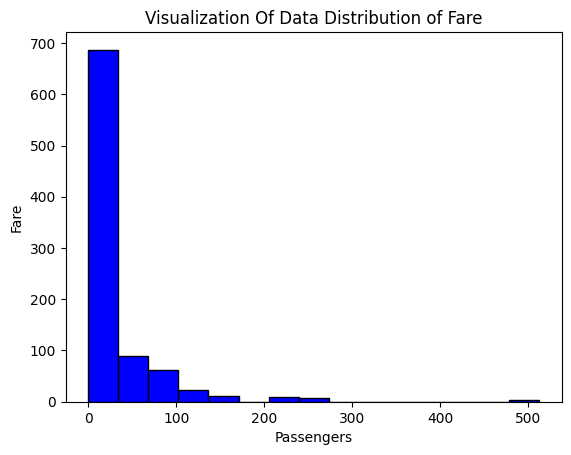

In [5]:
""" Need to include this line so that the plots show up in Jupyter Notebook """
%matplotlib inline
import matplotlib.pyplot as plt

# Show the updated Dataframe
print("DataFrame after removing columns:")
display(titanic_df_dropped.head())

print("\n")

# print("Fare Column: ")
# display(titanic_df_dropped['Fare'].reset_index())      # Select the 'Fare' column from the Dataframe and display its values
""" 
    index	Fare
0	0	    7.2500
1	1	    71.2833
2	2	    7.9250
3	3	    53.1000
4	4	    8.0500 """

""" Define a histogram diagram of the 'Fare' column using the data from the 'Fare' column and with several parameters

Parameters: 
bins: optional parameter contains integer or sequence or strings
color: optional parameter used to set color
edgecolor:  The color(s) for bar edges. The parameter takes a color or list of colors."""
plt.hist(titanic_df_dropped['Fare'], color = 'blue', bins=15, align = 'mid', orientation = 'vertical', edgecolor='black' )  

# Set the labels and title
plt.xlabel('Passengers')        # Define the x-axis label
plt.ylabel('Fare')              # Define the y-axis label
plt.title('Visualization Of Data Distribution of Fare')     # Define a title for the histogram

# Display the plot
plt.show()

### One Insight:
One insight I can draw from the histogram plot fare distribution above is that a small number of passengers paid a high fare to board the Titanic. 

This also means that a large number of passengers on the Titanic instead paid a small fare to board the vessel.

### Question 1(f)   (2 marks)
Design a boxplot to visualise `Fare` to identify outliners

DataFrame after removing columns:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

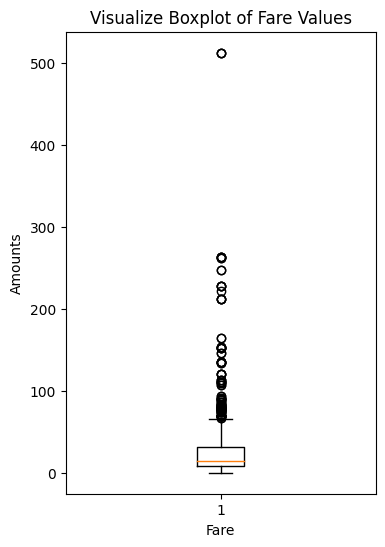

In [6]:
""" Need to include this line so that the plots show up in Jupyter Notebook """
%matplotlib inline
import matplotlib.pyplot as plt

# Show the updated Dataframe
print("DataFrame after removing columns:")
display(titanic_df_dropped.head())

print("\n")

# print("Fare Column: ")
# display(titanic_df_dropped['Fare'].reset_index())      # Select the 'Fare' column from the Dataframe and display its values
""" 
    index	Fare
0	0	    7.2500
1	1	    71.2833
2	2	    7.9250
3	3	    53.1000
4	4	    8.0500 """

""" Define a boxplot diagram to visualize the 'Fare' column to display outliners """
plt.figure(figsize=(4, 6))      # Create a new figure and set a custom figure size

plt.boxplot(x = titanic_df_dropped['Fare'], vert = True, whis = 1.5, manage_ticks = True)     # Create a boxplot using the 'Fare' column values as the x-axis with the various parameters

plt.xlabel('Fare')      # Define the x-axis label

plt.ylabel('Amounts')     # Define the y-axis label

plt.title('Visualize Boxplot of Fare Values')       # Define a title for the figure

plt.show()


### Questionm 1(g) (2 marks)
Perform the required task in Q1(e) and Q1(f) for `Age`.

DataFrame after removing columns:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

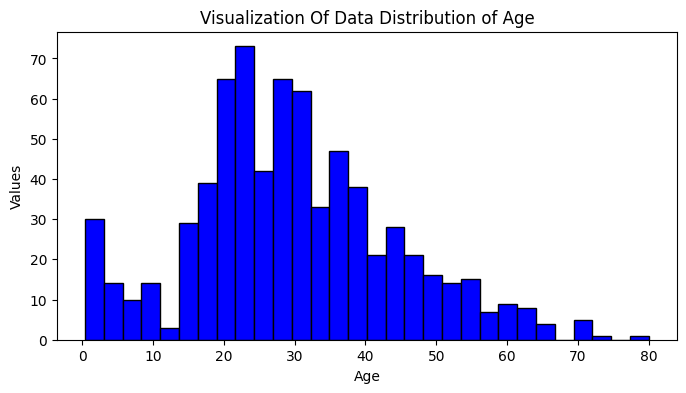

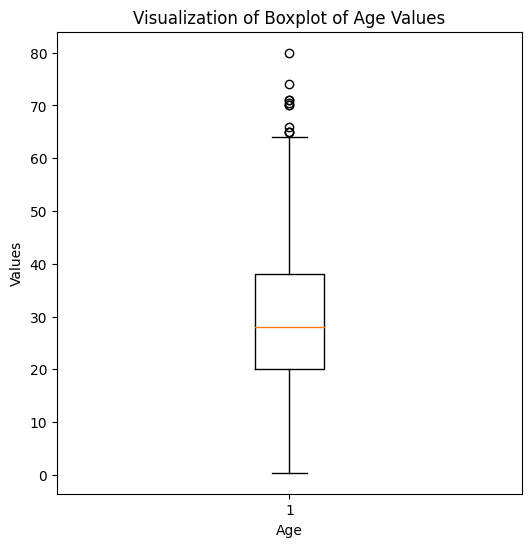

In [7]:
""" Need to include this line so that the plots show up in Jupyter Notebook """
%matplotlib inline
import matplotlib.pyplot as plt

# Show the updated Dataframe
print("DataFrame after removing columns:")
display(titanic_df_dropped.head())

print("\n")

# print("Age Column: ")
# display(titanic_df_dropped['Age'].reset_index())      # Select the 'Age' column from the Dataframe and display its values
""" 
    index	Age
0	0	22.0
1	1	38.0
2	2	26.0
3	3	35.0
4	4	35.0 """


""" Perform the required task in Q1(e) `Age`. """

plt.figure(figsize=(8, 4))

""" Define a histogram diagram of the 'Age' column using the data from the 'Age' column and with several parameters

Parameters: 
bins: optional parameter contains integer or sequence or strings
color: optional parameter used to set color
edgecolor:  The color(s) for bar edges. The parameter takes a color or list of colors """
plt.hist(titanic_df_dropped['Age'], color = 'blue', bins=30, align = 'mid', orientation = 'vertical', edgecolor='black' )

# Set the labels and title
plt.xlabel('Age')        # Define the x-axis label
plt.ylabel('Values')              # Define the y-axis label
plt.title('Visualization Of Data Distribution of Age')     # Define a title for the histogram

# Display the plot
plt.show()



print("\n")



""" Perform the required task in Q1(f) `Age`. """

age_dropped = titanic_df_dropped['Age'].dropna(axis = 'index', inplace = False)        # The 'age' column contains missing values so it will display an empty boxplot if they are not removed.

# Use the dropna() to remove the empty rows in the 'age' column

""" Define a boxplot diagram to visualize the 'Age' column to display outliners """

plt.figure(figsize=(6, 6))      # Create a new figure and set a custom figure size

plt.boxplot(x = age_dropped, vert = True, whis = 1.5, manage_ticks = True)     # Create a boxplot using the 'Age' column values as the x-axis with the various parameters

plt.xlabel('Age')      # Define the x-axis label

plt.ylabel('Values')     # Define the y-axis label

plt.title('Visualization of Boxplot of Age Values')       # Define a title for the figure

plt.show()



### Question 1(h)   (3 marks)
Design and perform visualisation to identify if there is correlation exists between `Pclass` and `Survived`.

DataFrame after removing columns:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S



Average survival rate based on Pclass: 


Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

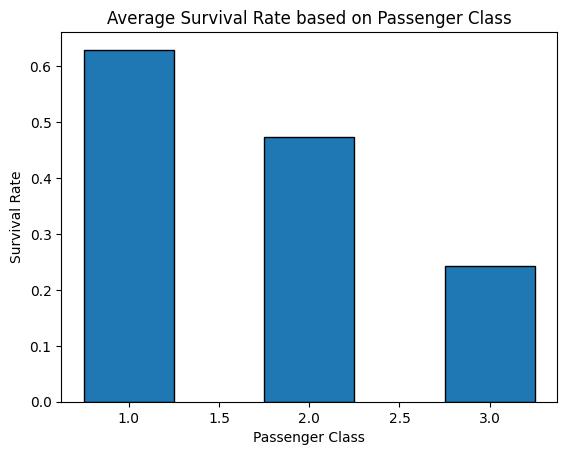

In [8]:
""" Need to include this line so that the plots show up in Jupyter Notebook """
%matplotlib inline
import matplotlib.pyplot as plt

# Show the updated Dataframe
print("DataFrame after removing columns:")
display(titanic_df_dropped.head())

print("\n")


""" Display the correlation between the 'Pclass' column and 'Survived' column """
groupby_pclass = titanic_df_dropped.groupby('Pclass')       # Use the groupby() on the 'Pclass' column 

# display(groupby_pclass)
""" <pandas.core.groupby.generic.DataFrameGroupBy object at 0x14c6a4850> """

# And select the 'Survived' column
survived_by_pclass = groupby_pclass['Survived']

# display(survived_by_pclass)
# """ <pandas.core.groupby.generic.SeriesGroupBy object at 0x14c941d10> """

survived_by_pclass = survived_by_pclass.mean()      # Use the mean() to get the average between survived and Pclass

print("Average survival rate based on Pclass: ")
display(survived_by_pclass.reset_index())
# """ 
#     Pclass	Survived
# 0	  1	        0.629630
# 1   2	        0.472826
# 2	  3	        0.242363 """

print("\n")


""" Since the question does not specify how to visualize data. 
I have decided to visualize the data using a bar graph """

survived_by_pclass_index = survived_by_pclass.index     # Call the 'index' attribute on the 'survived_by_pclass' series to get the index labels
# display(survived_by_pclass_index)
""" Int64Index([1, 2, 3], dtype='int64', name='Pclass') """

survived_by_pclass_indexList = survived_by_pclass_index.to_list()     # Store the index label into a list
# display(survived_by_pclass_indexList)        # [1, 2, 3]



survived_by_pclass_values = survived_by_pclass.values      # Use the values attribute on the Series to get the Series values into an array
# display(survived_by_pclass_values)
# # array([0.62962963, 0.47282609, 0.24236253])

survived_by_pclass_valuesList = survived_by_pclass_values.tolist()        # Convert the array into a list
# display(survived_by_pclass_valuesList)      # [0.6296296296296297, 0.47282608695652173, 0.24236252545824846]


""" Parameters:
x: The x coordinates of the bars. 
height: The height(s) of the bars. """
plt.bar(x = survived_by_pclass_indexList, height = survived_by_pclass_valuesList, width = 0.5, edgecolor = 'black')

plt.xlabel('Passenger Class')

plt.ylabel('Survival Rate')

plt.title('Average Survival Rate based on Passenger Class')

plt.show()

### Question 1(i)   (2 marks)
Perform the required task in Q1(h) for `Sex` and `Survived`

DataFrame after removing columns:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S



Average survival rate based on Sex: 


Sex  Survived
0  female  0.742038
1    male  0.188908

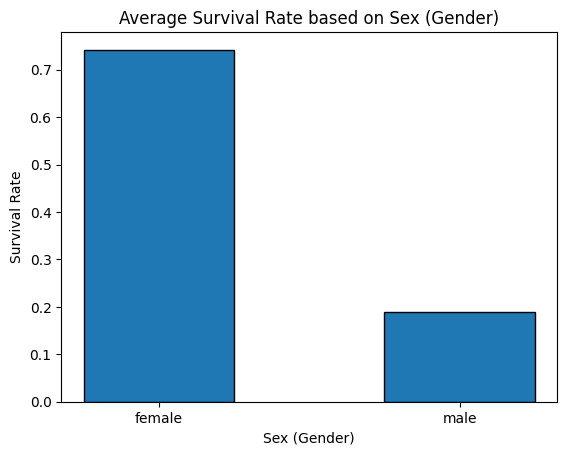

In [9]:
""" Need to include this line so that the plots show up in Jupyter Notebook """
%matplotlib inline
import matplotlib.pyplot as plt

# Show the updated Dataframe
print("DataFrame after removing columns:")
display(titanic_df_dropped.head())

print("\n")

""" Display the correlation between the 'Sex' column and 'Survived' column """
groupby_sex = titanic_df_dropped.groupby('Sex')       # Use the groupby() on the 'Sex' column 

# display(groupby_sex)
""" <pandas.core.groupby.generic.DataFrameGroupBy object at 0x14cfab550> """


# And select the 'Survived' column
survived_by_sex = groupby_sex['Survived']

# display(survived_by_sex)
""" <pandas.core.groupby.generic.SeriesGroupBy object at 0x14ce84190> """

survived_by_sex = survived_by_sex.mean()      # Use the mean() to get the average between survived and Pclass

print("Average survival rate based on Sex: ")
display(survived_by_sex.reset_index())
""" 
    Sex	    Survived
0	female	0.742038
1	male	0.188908 """


print("\n")


""" Since the question does not specify how to visualize data. 
I have decided to visualize the data using a bar graph """

survived_by_sex_index = survived_by_sex.index     # Call the 'index' attribute on the 'survived_by_sex' series to get the index labels
# display(survived_by_sex_index)
""" Index(['female', 'male'], dtype='object', name='Sex') """

survived_by_sex_indexList = survived_by_sex_index.to_list()     # Store the index label into a list
# display(survived_by_sex_indexList)        # ['female', 'male']


survived_by_sex_values = survived_by_sex.values      # Use the values attribute on the Series to get the Series values into an array
# display(survived_by_sex_values)
# array([0.74203822, 0.18890815])

survived_by_sex_valuesList = survived_by_sex_values .tolist()        # Convert the array into a list
# display(survived_by_sex_valuesList)      # [0.7420382165605095, 0.18890814558058924]


""" Parameters:
x: The x coordinates of the bars. 
height: The height(s) of the bars. """
plt.bar(x = survived_by_sex_indexList, height = survived_by_sex_valuesList, width = 0.5, edgecolor = 'black')

plt.xlabel('Sex (Gender)')

plt.ylabel('Survival Rate')

plt.title('Average Survival Rate based on Sex (Gender)')

plt.show()

### Question 1(j)   (4 marks)
Create a new ordinal discrete field called `AgeBand` from the continuous `Age`. 

There can be 5 age bands: [0, 16], (16, 32], (32, 48], (48, 64] and (64, 80].

For example, a passenger with `Age` of 22 has the `AgeBand` of (16, 32].

**Notes:** <br>
The notation used to define the age bands is based on mathematical notation for intervals. In this case, (64,80] means that the interval includes all values greater than 64 and less than or equal to 80. On the other hand, [64,80] would mean that the interval includes all values greater than or equal to 64 and less than or equal to 80.

In the context of this problem, it doesn't matter which notation is used as long as it is consistent. However, in general, it is important to use the correct notation to avoid confusion and ensure that calculations are performed correctly.

In [10]:
# Show the updated Dataframe
print("DataFrame after removing columns:")
display(titanic_df_dropped.head())

print("\n")


# print("Age Column: ")
# display(titanic_df_dropped['Age'].reset_index())      # Select the 'Age' column from the Dataframe and display its values
""" 
    index	Age
0	0	22.0
1	1	38.0
2	2	26.0
3	3	35.0
4	4	35.0 """

# print("\n")

""" Todo 1. Create the AgeBand's """

AgeBand_bin_criteria = [0, 16, 32, 48, 64, 80]      # Create a list that takes the 1st value of each of 5 AgeBands stipulated above

AgeBand_bin_labels = ['[0, 16]', '(16, 32]', '(32, 48]', '(48, 64]', '(64, 80]']    # Create another list that stores each of the 5 AgeBands as an element


""" Todo 2. Create a new column in the Series called 'AgeBand' using the pd.cut().
The cut() is used to separate the array elements into different bins  

Store the 'age_array' as the input array to be binned

Store the 'AgeBand_bin_criteria' list as the bin edges

Store the 'AgeBand_bin_labels' list as the labels for returned bins

Parameters: 
x: The input array to be binned. Must be 1-dimensional.
bins: defines the bin edges for the segmentation.
right : (bool, default True )  Indicates whether bins includes the rightmost edge or not.
labels : (array or bool, optional)  Specifies the labels for the returned bins. 
retbins : (bool, default False) Whether to return the bins or not. Useful when bins is provided as a scalar.
"""
age_array = titanic_df_dropped['Age'].to_numpy()        # Convert the Dataframe 'AgeBand' column into an arraY

titanic_df_dropped['AgeBand'] = pd.cut(x = age_array, bins = AgeBand_bin_criteria, right = True, labels = AgeBand_bin_labels, retbins = False)


""" Todo 3. Display the updated AgeBand Column """
print("Dataframe AgeBand Column: ")
display(titanic_df_dropped['AgeBand'].reset_index())

print("\n")

""" Todo 4. Display the updated Dataframe After AgeBand Column Was Added """
print("DataFrame after AgeBand Column Was Added:")
display(titanic_df_dropped)

DataFrame after removing columns:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S



Dataframe AgeBand Column: 


index   AgeBand
0        0  (16, 32]
1        1  (32, 48]
2        2  (16, 32]
3        3  (32, 48]
4        4  (32, 48]
..     ...       ...
886    886  (16, 32]
887    887  (16, 32]
888    888       NaN
889    889  (16, 32]
890    890  (16, 32]

[891 rows x 2 columns]



DataFrame after AgeBand Column Was Added:


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked   AgeBand  
0        0         A/5 21171   7.2500        S  (16, 32]  
1        0          PC 17599  71.2833        C  (32, 48]  
2        0  STON/O2. 3101282   7.9250        S  (16, 32]  
3        0            113803  53.1000        S  (32, 48]  
4        0            373450   8.0500        S  (32, 48]  
..     ...               ...      ...      ...       ...  
886      0            211536  13.0000        S  (16, 32]  
887      0            112053  30.0000        S  (16, 32]  
888      2        W./C. 6607  23.4500        S       NaN  
889      0            111369  30.0000        C  (16, 32]  
890      0            370376   7.7500        Q  (16, 32]  

[891 rows x 12 columns]

### Question 1(k)   (2 marks)
Perform the required task in Q1(h) for `AgeBand` and `Survived`.

Design and perform visualisation to identify if there is correlation exists between `AgeBand` and `Survived`.

DataFrame after AgeBand Column Was Added:


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked   AgeBand  
0        0         A/5 21171   7.2500        S  (16, 32]  
1        0          PC 17599  71.2833        C  (32, 48]  
2        0  STON/O2. 3101282   7.9250        S  (16, 32]  
3        0            113803  53.1000        S  (32, 48]  
4        0            373450   8.0500        S  (32, 48]  
..     ...               ...      ...      ...       ...  
886      0            211536  13.0000        S  (16, 32]  
887      0            112053  30.0000        S  (16, 32]  
888      2        W./C. 6607  23.4500        S       NaN  
889      0            111369  30.0000        C  (16, 32]  
890      0            370376   7.7500        Q  (16, 32]  

[891 rows x 12 columns]



Dataframe AgeBand Column: 


index   AgeBand
0        0  (16, 32]
1        1  (32, 48]
2        2  (16, 32]
3        3  (32, 48]
4        4  (32, 48]
..     ...       ...
886    886  (16, 32]
887    887  (16, 32]
888    888       NaN
889    889  (16, 32]
890    890  (16, 32]

[891 rows x 2 columns]



Average survival rate based on ageband: 


AgeBand  Survived
0   [0, 16]  0.550000
1  (16, 32]  0.369942
2  (32, 48]  0.404255
3  (48, 64]  0.434783
4  (64, 80]  0.090909

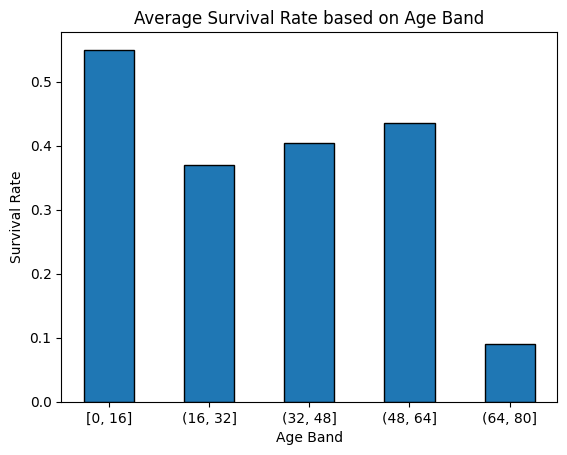

In [11]:
""" Need to include this line so that the plots show up in Jupyter Notebook """
%matplotlib inline
import matplotlib.pyplot as plt

print("DataFrame after AgeBand Column Was Added:")
display(titanic_df_dropped)

print("\n")

print("Dataframe AgeBand Column: ")
display(titanic_df_dropped['AgeBand'].reset_index())

print("\n")


""" Display the correlation between the 'AgeBand' column and 'Survived' column """
groupby_ageband = titanic_df_dropped.groupby('AgeBand')       # Use the groupby() on the 'AgeBand' column 

# display(groupby_pclass)
""" <pandas.core.groupby.generic.DataFrameGroupBy object at 0x128eed190> """

# And select the 'Survived' column
survived_by_ageband = groupby_ageband['Survived']

# display(survived_by_ageband)
""" <pandas.core.groupby.generic.SeriesGroupBy object at 0x129212a10> """

survived_by_ageband = survived_by_ageband.mean()      # Use the mean() to get the average between survived and ageband

print("Average survival rate based on ageband: ")
display(survived_by_ageband.reset_index())
""" 
	AgeBand	    Survived
0	[0, 16]	    0.550000
1	(16, 32]	0.369942
2	(32, 48]	0.404255
3	(48, 64]	0.434783
4	(64, 80]	0.090909 """

print("\n")



""" Since the question does not specify how to visualize data. 
I have decided to visualize the data using a bar graph """

survived_by_ageband_index = survived_by_ageband.index     # Call the 'index' attribute on the 'survived_by_ageband' series to get the index labels
# display(survived_by_ageband_index)
""" CategoricalIndex(['[0, 16]', '(16, 32]', '(32, 48]', '(48, 64]', '(64, 80]'], categories=['[0, 16]', '(16, 32]', '(32, 48]', '(48, 64]', '(64, 80]'], ordered=True, dtype='category', name='AgeBand') """

survived_by_ageband_indexList = survived_by_ageband_index.to_list()     # Store the index label into a list
# display(survived_by_ageband_indexList)        # ['[0, 16]', '(16, 32]', '(32, 48]', '(48, 64]', '(64, 80]']


survived_by_ageband_values = survived_by_ageband.values      # Use the values attribute on the Series to get the Series values into an array
# display(survived_by_ageband_values)
# array([0.55      , 0.3699422 , 0.40425532, 0.43478261, 0.09090909])

survived_by_ageband_valuesList = survived_by_ageband_values.tolist()        # Convert the array into a list
# display(survived_by_ageband_valuesList)      
""" 
[0.55,
 0.3699421965317919,
 0.40425531914893614,
 0.43478260869565216,
 0.09090909090909091] """

 

""" Parameters:
x: The x coordinates of the bars. 
height: The height(s) of the bars. """
plt.bar(x = survived_by_ageband_indexList, height = survived_by_ageband_valuesList, width = 0.5, edgecolor = 'black')

plt.xlabel('Age Band')

plt.ylabel('Survival Rate')

plt.title('Average Survival Rate based on Age Band')

plt.show()

### Question 1(l)   (4 marks)
Create a new field called `Title` which is extracted from the `Name` field. For example, `Mr` is extracted from the name `Braund, Mr. Owen Harris`. 

The extraction rule is that the word ending with `.` within a name is the title of that name.

Standardise uncommon `Title` values by following the mapping shown in Table 2. 

Compute and display the count per title.

### Table 2: Mapping of values to standardise uncommon `Title` values

**From title** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp; **To title**

Mlle, Ms &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp; Miss
<br><br>
Rev, Major, Col, Don, Sir, Capt, Jonkheer, Lady, Mme, Countess &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      | &nbsp; Uncommon

In [12]:
# import re

print("DataFrame after AgeBand Column Was Added:")
display(titanic_df_dropped)

print("\n")

# Select the name column from the Dataframe
print("Name column:")
# display(titanic_df_dropped['Name'].reset_index())
""" 
	index	Name
0	0	    Braund, Mr. Owen Harris
1	1	    Cumings, Mrs. John Bradley (Florence Briggs Th...
2	2	    Heikkinen, Miss. Laina
3	3	    Futrelle, Mrs. Jacques Heath (Lily May Peel)
4	4	    Allen, Mr. William Henry """

print("\n")


""" Todo 1. Create a new 'Title' column from the 'Name' column 
Use regular expression pattern to access each saluatations in each name """

""" We will be using these raw strings using the special character r
( ) - Group
[A-Za-z] - Matches all the uppercase letters and lowercase letters
+ - Return 1 or More """
title_pattern = r'([A-Za-z]+)\.'


""" Use the call the str access and extract() to extract the salutations from each row in the Title column """
extracted_salutations = titanic_df_dropped['Name'].str.extract(pat = title_pattern, flags=0, expand=True)

titanic_df_dropped['Title'] = extracted_salutations

# print("Title column:")
# display(titanic_df_dropped['Title'].reset_index())
""" 
	index	Title
0	0		Mr
1	1		Mrs
2	2		Miss
3	3		Mrs
4	4		Mr """


""" Todo 2. Based on the information in Table 2: Mapping of values to standardise uncommon `Title` values

We will create a dictionary to assign the various salutations to 2 types. We will assign Mlle and Ms as keys with a value of Miss. Assign the rest of the salutations as keys with a value of uncommon.   """
salutation_mapping = {
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Rev': 'Uncommon',
    'Major': 'Uncommon',
    'Col': 'Uncommon',
    'Don': 'Uncommon',
    'Sir': 'Uncommon',
    'Capt': 'Uncommon',
    'Jonkheer': 'Uncommon',
    'Lady': 'Uncommon',
    'Mme': 'Uncommon',
    'Countess': 'Uncommon'
}


""" Todo 3. We will use the map() on the Title series to map the series with the 'salutation_mapping' dictionary which will result in a new column.

We also need to fill the NaN values with values from the Title column  """
mapped_cleaned_title_col = titanic_df_dropped['Title'].map(salutation_mapping).fillna(value = titanic_df_dropped['Title'], inplace = False, method = None)

titanic_df_dropped['Title'] = mapped_cleaned_title_col

print("Salutations extracted from the Name column and stored into Title column:")
display(titanic_df_dropped.head(5))

print("\n")


""" Todo 4. Compute and display the count per title. 

Use the value_counts() on the Title column to count the number of unique values """
count_per_title = titanic_df_dropped['Title'].value_counts(normalize = False, sort = True)

print("Count per Title:")
display(count_per_title.reset_index())

DataFrame after AgeBand Column Was Added:


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked   AgeBand  
0        0         A/5 21171   7.2500        S  (16, 32]  
1        0          PC 17599  71.2833        C  (32, 48]  
2        0  STON/O2. 3101282   7.9250        S  (16, 32]  
3        0            113803  53.1000        S  (32, 48]  
4        0            373450   8.0500        S  (32, 48]  
..     ...               ...      ...      ...       ...  
886      0            211536  13.0000        S  (16, 32]  
887      0            112053  30.0000        S  (16, 32]  
888      2        W./C. 6607  23.4500        S       NaN  
889      0            111369  30.0000        C  (16, 32]  
890      0            370376   7.7500        Q  (16, 32]  

[891 rows x 12 columns]



Name column:


Salutations extracted from the Name column and stored into Title column:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  
0      0         A/5 21171   7.2500        S  (16, 32]    Mr  
1      0          PC 17599  71.2833        C  (32, 48]   Mrs  
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss  
3      0            113803  53.1000        S  (32, 48]   Mrs  
4      0            373450   8.0500        S  (32, 48]    Mr



Count per Title:


index  Title
0        Mr    517
1      Miss    185
2       Mrs    125
3    Master     40
4  Uncommon     17
5        Dr      7

### Question 1(m)   (2 marks)
Create a new field `Alone` for passengers having no siblings / spouses and no parents / children: use 1 for alone passengers and 0 for passengers travelling with someone.

Justify if there is any correlation between `Alone` and `Survived`.

In [13]:
print("DataFrame after AgeBand Column and Title Column Was Added:")
display(titanic_df_dropped)

print("\n")


""" Todo 1. Create a new field `Alone` for passengers having no siblings / spouses and no parents / children """

sibsp = titanic_df_dropped['SibSp']     # Select the elements from the 'SibSp' column
# display(sibsp.reset_index())
""" 
    index	SibSp
0	0	    1
1	1	    1
2	2	    0
3	3	    1
4	4	    0 """

parch = titanic_df_dropped['Parch']     # Select the elements from the 'Parch' column
# display(parch.reset_index())
""" 
    index	Parch
0	0	    0
1	1	    0
2	2	    0
3	3	    0
4	4	    0 """

""" Todo 2. We will filter the dataframe for passengers who do not have siblings, spuses, parents, and children inclusive and Assign the result to a new column 'Alone' """
titanic_df_dropped['Alone'] = (sibsp == 0) & (parch == 0)

# display(titanic_df_dropped['Alone'].reset_index())
""" 
    index	Alone
0	0	    False
1	1	    False
2	2	    True
3	3	    False
4	4	    True """


""" Todo 3. Use the astype() on the 'Alone' column to convert its boolean values from True and False to 1 and 0. 

Assign the result series to the 'Alone' column """
type_change_alone = titanic_df_dropped['Alone'].astype(dtype = int, errors='raise')

titanic_df_dropped['Alone'] = type_change_alone

print("DataFrame with 'Alone' column: ")
display(titanic_df_dropped.head())

print("\n")


""" Todo 4. Compute the correlation if there is any between the 'Alone' column and 'Survived' Column 

Below, we used the corr() to calculate the correlation between the 'Alone' column and 'Survived' column """
correlation = titanic_df_dropped['Alone'].corr(other = titanic_df_dropped['Survived'], method = 'pearson', min_periods = None)

print(f"Computed Correlation between 'Alone' column and 'Survived' column: {correlation}")

DataFrame after AgeBand Column and Title Column Was Added:


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked   AgeBand     Title  
0        0         A/5 21171   7.2500        S  (16, 32]        Mr  
1        0          PC 17599  71.2833        C  (32, 48]       Mrs  
2        0  STON/O2. 3101282   7.9250        S  (16, 32]      Miss  
3        0            113803  53.1000        S  (32, 48]       Mrs  
4        0            373450   8.0500        S  (32, 48]        Mr  
..     ...               ...      ...      ...       ...       ...  
886      0            211536  13.0000        S  (16, 32]  Uncommon  
887      0            112053  30.0000        S  (16, 32]      Miss  
888      2        W./C. 6607  23.4500        S       NaN      Miss  
889      0            111369  30.0000        C  (16, 32]        Mr  
890      0            370376   7.7500        Q  (16, 32]        Mr  

[891 rows x 13 columns]



DataFrame with 'Alone' column: 


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0  
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0  
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1  
3      0            113803  53.1000        S  (32, 48]   Mrs      0  
4      0            373450   8.0500        S  (32, 48]    Mr      1



Computed Correlation between 'Alone' column and 'Survived' column: -0.203367085699892


### Justification:
Based on the correlation value, there is a correlation between the `Alone` and `Survived` columns.

Since the correlation value is negative, it can be deduced that there is a negative association between both columns.


### Question 1(n)   (2 marks)
Create a new field `TravelWith` where `TravelWith` = `SibSp` + `Parch`. 

Justify if there is any correlation between `TravelWith` and `Survived`.

In [14]:
print("DataFrame after AgeBand Column, Title Column and Alone Column Were Added:")
display(titanic_df_dropped)

print("\n")

sibsp = titanic_df_dropped['SibSp']     # Select the elements from the 'SibSp' column
# display(sibsp.reset_index())
""" 
    index	SibSp
0	0	    1
1	1	    1
2	2	    0
3	3	    1
4	4	    0 """

parch = titanic_df_dropped['Parch']     # Select the elements from the 'Parch' column
# display(parch.reset_index())
""" 
    index	Parch
0	0	    0
1	1	    0
2	2	    0
3	3	    0
4	4	    0 """


""" Todo 1. Create a new column 'TravelWith' by concatenating the 'SibSp' and 'Parch' columns """
travel_with = sibsp + parch


""" Todo 2. Create the new column 'TravelWith' in the Dataframe by assigning it the 'travel_with' """
titanic_df_dropped['TravelWith'] = travel_with 

print("DataFrame with 'TravelWith' column:")
display(titanic_df_dropped.head())

print("\n")


""" Todo 3. Compute the correlation if there is any between the 'TravelWith' column and 'Survived' Column

Below, we used the corr() to calculate the correlation between the 'Alone' column and 'Survived' column  """
correlation = titanic_df_dropped['TravelWith'].corr(other = titanic_df_dropped['Survived'], method = 'pearson', min_periods = None)

print(f"Computed Correlation between 'TravelWith' column and 'Survived' column: {correlation}")

DataFrame after AgeBand Column, Title Column and Alone Column Were Added:


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked   AgeBand     Title  Alone  
0        0         A/5 21171   7.2500        S  (16, 32]        Mr      0  
1        0          PC 17599  71.2833        C  (32, 48]       Mrs      0  
2        0  STON/O2. 3101282   7.9250        S  (16, 32]      Miss      1  
3        0            113803  53.1000        S  (32, 48]       Mrs      0  
4        0            373450   8.0500        S  (32, 48]        Mr      1  
..     ...               ...      ...      ...       ...       ...    ...  
886      0            211536  13.0000        S  (16, 32]  Uncommon      1  
887      0            112053  30.0000        S  (16, 32]      Miss      1  
888      2        W./C. 6607  23.4500        S       NaN      Miss      0  
889      0            111369  30.0000        C  (16, 32]        Mr      1  
890      0            370376   7.7500        Q  (16, 32]        Mr      1  

[891 rows x 14 columns]



DataFrame with 'TravelWith' column:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  \
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0   
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0   
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1   
3      0            113803  53.1000        S  (32, 48]   Mrs      0   
4      0            373450   8.0500        S  (32, 48]    Mr      1   

   TravelWith  
0           1  
1           1  
2           0  
3           1  
4           0



Computed Correlation between 'TravelWith' column and 'Survived' column: 0.01663898928274525


### Justification:
Based on the correlation value, there is a correlation between the `TravelWith` and `Survived` columns.

Since the correlation value is positive, it can be deduced that there is a positive association between both columns.

### Question 1(o)   (3 marks)
Divide the `ln(Fare + 1)` into 5 even bands between its min and max values to create a new field called `LogFareBand`. 

Justify if there is any correlation between `LogFareBand` and `Survived`. Note that ln is natural log.

In [15]:
import numpy as np

print("DataFrame after AgeBand Column, Title Column, Alone Column and TravelWith Column Were Added:")
display(titanic_df_dropped.head())

print("\n")

# display(titanic_df_dropped['Fare'].reset_index())
"""
    index	Fare
0	0	    7.2500
1	1	    71.2833
2	2	    7.9250
3	3	    53.1000
4	4	    8.0500 """


""" Todo 1. Get the minimum value from from the 'Fare' column """
min_fare = titanic_df_dropped['Fare'].min()

""" Todo 2. Use the np.log() based on the Logarithm function above that takes them 'min_fare' which will be appended by 1

The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements. """
min_fare = np.log(min_fare + 1)


""" Todo 3. Get the maximum value from from the 'Fare' column """
max_fare = titanic_df_dropped['Fare'].max()

# display(max_fare)   # 512.3292

""" Todo 4. Use the np.log() based on the Logarithm function above that takes them 'max_fare' which will be appended by 1

The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements. """
max_fare = np.log(max_fare + 1)

# display(max_fare)   # 6.240917354759096


fare_bands = ['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5']        # Fare bands


""" Todo 5. Use the np.linespace() to create evenly spaced numbers over stated intervals
The numpy.linspace() function returns number spaces evenly w.r.t interval. 

Parameters: 
start  : [optional] start of interval range. By default start = 0
stop   : end of interval range 
num    : [int, optional] No. of samples to generate """
fareBins = np.linspace(start = min_fare, stop = max_fare, num = 6, endpoint = True, retstep = False)     # min_fare is the start value of the interval range

# max_fare is the end value of the interval range

# display(fareBins)
""" 
array([0.        , 1.24818347, 2.49636694, 3.74455041, 4.99273388,
       6.24091735]) """


""" Todo 6. Assign the logarithm equation to 'log_of_fare_append_1' """
log_of_fare_append_1 = np.log(titanic_df_dropped['Fare'] + 1)       


""" Todo 7. Create a new column in the Series called 'LogFareBand' using the pd.cut().
The cut() is used to separate the array elements into different bins  

Store the 'log_of_fare_append_1' as the input array to be binned

Store the 'fareBins' list as the bin edges

Store the 'fare_bands' list as the labels for returned bins

Parameters: 
x: The input array to be binned. Must be 1-dimensional.
bins: defines the bin edges for the segmentation.
right : (bool, default True )  Indicates whether bins includes the rightmost edge or not.
labels : (array or bool, optional)  Specifies the labels for the returned bins. 
retbins : (bool, default False) Whether to return the bins or not. Useful when bins is provided as a scalar.
"""
LogFareBand = pd.cut(x = log_of_fare_append_1, bins = fareBins, labels = fare_bands, right = True, retbins = False, precision = 3, ordered = True)

titanic_df_dropped['LogFareBand'] = LogFareBand


""" Todo 8. Select the Fare and LogFareBand columns from the Dataframe and display the results """
print("DataFrame with 'LogFareBand' column:")
display(titanic_df_dropped[['Fare', 'LogFareBand']])
""" 
    Fare	    LogFareBand
0	7.2500	    Band 2
1	71.2833	    Band 4
2	7.9250	    Band 2
3	53.1000	    Band 4
4	8.0500	    Band 2 """



""" Todo 9. Use the astype() on the 'LogFareBand' column to convert its String values into a category data type 

Categoricals are a pandas data type corresponding to categorical variables in statistics. 

The 'LogFareBand' column values will now be considered as categorical and not String """
LogFareBand_categorical_values = titanic_df_dropped['LogFareBand'].astype(dtype = 'category', copy = True)  

print("\n")


print("LogFareBand Categorical Values: ")
display(LogFareBand_categorical_values.reset_index())
""" 
	index	LogFareBand
0	0	    Band 2
1	1	    Band 4
2	2	    Band 2
3	3	    Band 4
4	4	    Band 2 """

print("\n")


""" Todo 10. Return the 'LogFareBand_categorical_values' Series of codes as well as the index. """

""" Series.cat.codes: Return Series of codes as well as the index. """
print("LogFareBand categorical values codes ")
LogFareBand_categorical_values_codes = LogFareBand_categorical_values.cat.codes

display(LogFareBand_categorical_values_codes.reset_index())
""" 
    index	0
0	0	    1
1	1	    3
2	2	    1
3	3	    3
4	4	    1 """



""" Todo 11. Compute the correlation if there is any between the 'LogFareBand_categorical_values_codes' column and 'Survived' Column 

Below, we used the corr() to calculate the correlation between the 'Alone' column and 'Survived' column """
correlation = LogFareBand_categorical_values_codes.corr(
other = titanic_df_dropped['Survived'], method='pearson', min_periods=None)

print(f"Correlation between the 'LogFareBand' column and 'Survived' column: {correlation}")

DataFrame after AgeBand Column, Title Column, Alone Column and TravelWith Column Were Added:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  \
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0   
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0   
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1   
3      0            113803  53.1000        S  (32, 48]   Mrs      0   
4      0            373450   8.0500        S  (32, 48]    Mr      1   

   TravelWith  
0           1  
1           1  
2           0  
3           1  
4           0



DataFrame with 'LogFareBand' column:


Fare LogFareBand
0     7.2500      Band 2
1    71.2833      Band 4
2     7.9250      Band 2
3    53.1000      Band 4
4     8.0500      Band 2
..       ...         ...
886  13.0000      Band 3
887  30.0000      Band 3
888  23.4500      Band 3
889  30.0000      Band 3
890   7.7500      Band 2

[891 rows x 2 columns]



LogFareBand Categorical Values: 


index LogFareBand
0        0      Band 2
1        1      Band 4
2        2      Band 2
3        3      Band 4
4        4      Band 2
..     ...         ...
886    886      Band 3
887    887      Band 3
888    888      Band 3
889    889      Band 3
890    890      Band 2

[891 rows x 2 columns]



LogFareBand categorical values codes 


index  0
0        0  1
1        1  3
2        2  1
3        3  3
4        4  1
..     ... ..
886    886  2
887    887  2
888    888  2
889    889  2
890    890  1

[891 rows x 2 columns]

Correlation between the 'LogFareBand' column and 'Survived' column: 0.3282061047302267


### Justification:
Based on the correlation value above, it can be deduced that there is a low positive correlation between natural logarithmic value of fare bands and the survival rate of passengers.

### Question 1(p)   (6 marks)
Conduct data imputation to fill missing values for `Age` by the steps below:

(i) Design a visualisation to prove the correlation between `Age` and the pair of
(`Pclass`,`Sex`).

(ii) Group by (`Pclass`, `Sex`) and compute the mean `Age` per group.

(iii) For each row with missing `Age` value, set its `Age` with the mean `Age` of its (`Pclass`,`Sex`).

(iv) Create a new field called `ImputedAge` and set the value to 1 for imputed `Age` and 0 for non-missing `Age`.

(v) Use imputed `Age` values to compute missing `AgeBand`.

### Conduct data imputation to fill missing values for `Age` by the steps below:
(i) Design a visualisation to prove the correlation between `Age` and the pair of
(`Pclass`,`Sex`).


DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column and LogFareBand Column Were Added:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  \
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0   
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0   
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1   
3      0            113803  53.1000        S  (32, 48]   Mrs      0   
4      0            373450   8.0500        S  (32, 48]    Mr      1   

   TravelWith LogFareBand  
0           1      Band 2  
1           1      Band 4  
2           0      Band 2  
3           1      Band 4  
4           0      Band 2



(i) Design a visualisation to prove the correlation between `Age` and the pair of(`Pclass`,`Sex`).


/var/folders/p4/h57wk41d6fl_0d2yvtsp6bzr0000gn/T/ipykernel_5160/4096141479.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


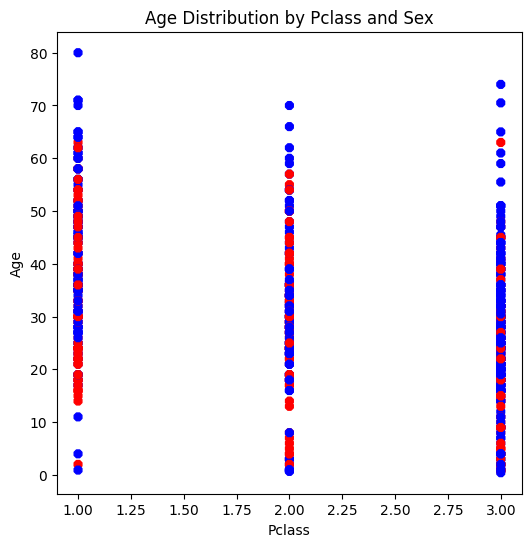

In [16]:
print("DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column and LogFareBand Column Were Added:")
display(titanic_df_dropped.head())

print("\n")


print("(i) Design a visualisation to prove the correlation between `Age` and the pair of(`Pclass`,`Sex`).")

""" Todo 1. Select the Age, Pclass and Sex columns from the Dataframe """
combined_df = titanic_df_dropped[['Age', 'Pclass', 'Sex']].copy()     # Create new copy of this Dataframe

# display(acombined_df .isnull())     # Check wheather any of the columns have empty values
""" 
    Age	    Pclass	Sex
0	False	False	False
1	False	False	False
2	False	False	False
3	False	False	False
4	False	False	False 

886	False	False	False
887	False	False	False
888	True	False	False
889	False	False	False
890	False	False	False"""


""" Todo 2. Remove empty rows from the 'Age' column  

Parameter: 
subset: List	Optional, specifies where to look for NULL values"""
combined_df = combined_df.dropna(axis = 'index', how = 'any', subset=['Age'])        # Use the subset attribute to specify the 'Age' column which is where to remove the empty values 


""" Because the question did not specify what type of plot to use, we will use a scatter plot """

# Create a scatter plot

plt.figure(figsize=(6, 6))      # Use the figsize attribute to change the figure size 

# We will use the map() on the Title series to map the series with the 'salutation_mapping' dictionary which will result in a new column.

colors_dict = {
    'male': 'blue', 
    'female': 'red'
}

""" Parameters:
x,y : float or array-like, shape (n, ) : The data positions.
c : array-like or list of colors or color, optional

The Pclass and Age colum values represents the x and y axis values and the sex values will be map to a color dictionary. """
plt.scatter(
    x = combined_df['Pclass'], 
    y = combined_df['Age'], 
    c = combined_df['Sex'].map(colors_dict),
    marker = "8",
    cmap = 'viridis'
)

plt.xlabel('Pclass')        # Define the label for the x axis

plt.ylabel('Age')       # Define the label for the y axis

plt.title('Age Distribution by Pclass and Sex')     # Define the title for the figure

plt.show()


### Conduct data imputation to fill missing values for `Age` by the steps below:
(ii) Group by (`Pclass`, `Sex`) and compute the mean `Age` per group.

In [17]:
print("DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column and LogFareBand Column Were Added:")
display(titanic_df_dropped.head())

print("\n")


print("(ii) Group by (`Pclass`, `Sex`) and compute the mean `Age` per group. ")

""" Group by the 'Pclass', 'Sex' columns """
groupyby_pclass_sex = titanic_df_dropped.groupby(['Pclass', 'Sex'])

age_per_group = groupyby_pclass_sex['Age']      # Select the age column from the groupby object

# display(age_group)
""" <pandas.core.groupby.generic.SeriesGroupBy object at 0x10ed89dd0> """

age_per_group_mean = age_per_group.mean()       # Get the average of the age column groupby object


# Display the average Age per group
print("Mean Age per group (Pclass, Sex):")

display(age_per_group_mean.reset_index())
""" 
    Pclass	Sex	    Age
0	1	    female	34.611765
1	1	    male	41.281386
2	2	    female	28.722973
3	2	    male	30.740707
4	3	    female	21.750000
5	3	    male	26.507589 """


DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column and LogFareBand Column Were Added:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  \
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0   
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0   
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1   
3      0            113803  53.1000        S  (32, 48]   Mrs      0   
4      0            373450   8.0500        S  (32, 48]    Mr      1   

   TravelWith LogFareBand  
0           1      Band 2  
1           1      Band 4  
2           0      Band 2  
3           1      Band 4  
4           0      Band 2



(ii) Group by (`Pclass`, `Sex`) and compute the mean `Age` per group. 
Mean Age per group (Pclass, Sex):


Pclass     Sex        Age
0       1  female  34.611765
1       1    male  41.281386
2       2  female  28.722973
3       2    male  30.740707
4       3  female  21.750000
5       3    male  26.507589

' \n    Pclass\tSex\t    Age\n0\t1\t    female\t34.611765\n1\t1\t    male\t41.281386\n2\t2\t    female\t28.722973\n3\t2\t    male\t30.740707\n4\t3\t    female\t21.750000\n5\t3\t    male\t26.507589 '

### Conduct data imputation to fill missing values for `Age` by the steps below:
(iii) For each row with missing `Age` value, set its `Age` with the mean `Age` of its (`Pclass`,`Sex`).

In [18]:
print("DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column and LogFareBand Column Were Added:")
display(titanic_df_dropped.head())

print("\n")


""" Use a for loop to loop through the Dataframe rows by using the iterrows() that takes a index and row object 

The iterrows() method generates an iterator object of the DataFrame, allowing us to iterate each row in the DataFrame. Each iteration produces an index object and a row object (a Pandas Series object)."""
for index, row in titanic_df_dropped.iterrows():

    """ Use an if statement to check if there are missing values in the 'Age' column using pd.isnull(). If this statement is True, execute the block: """
    if pd.isnull(row['Age']) is True:

        pclass_col = row['Pclass']      # Use the 'row' to select the 'Pclass' column

        # print(pclass_col)
        """ 
        3
        2
        3
        3
        3
        3
        1
        3 """

        sex_col = row['Sex']            # Use the 'row' to select the 'sex' column

        # print(sex_col)
        """ 
        male
        male
        female
        male
        female
        male """

        pclass_sex_tuple = (pclass_col, sex_col)        # Store both columns into a tuple

        """ Get the average Age for the ('Pclass', 'Sex') tuple """
        average_age = age_per_group_mean[pclass_sex_tuple]  # Select the 'pclass_sex_tuple' group as an element from the 'age_per_group_mean' series

        # print(average_age)
        """ 
        26.507588932806325
        30.74070707070707
        21.75
        26.507588932806325
        21.75
        26.507588932806325
        34.61176470588235
        21.75 """
        
        """ Pandas at[] is used to return data in a dataframe at the passed location. The passed location is in the format [position, Column Name]. 
        
        This method works in a similar way to Pandas loc[ ] but at[ ] is used to return an only single value and hence works faster than it. """
        # Set the missing Age value to the mean Age
        titanic_df_dropped.at[index, 'Age'] = average_age       # Assign the 'average_age' object to the Dataframe that calls the at[] property which takes the 'index' as the position and 'Age' as the column name
        
        # print(titanic_df_dropped.at[index, 'Age'])
        """ 
        26.507588932806325
        30.74070707070707
        21.75
        26.507588932806325
        21.75
        26.507588932806325
        34.61176470588235
        21.75
        26.507588932806325
        26.507588932806325
        26.507588932806325
        26.507588932806325 """


print("Dataframe with updated Age column: ")
display(titanic_df_dropped.head())



DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column and LogFareBand Column Were Added:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  \
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0   
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0   
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1   
3      0            113803  53.1000        S  (32, 48]   Mrs      0   
4      0            373450   8.0500        S  (32, 48]    Mr      1   

   TravelWith LogFareBand  
0           1      Band 2  
1           1      Band 4  
2           0      Band 2  
3           1      Band 4  
4           0      Band 2



Dataframe with updated Age column: 


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  \
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0   
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0   
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1   
3      0            113803  53.1000        S  (32, 48]   Mrs      0   
4      0            373450   8.0500        S  (32, 48]    Mr      1   

   TravelWith LogFareBand  
0           1      Band 2  
1           1      Band 4  
2           0      Band 2  
3           1      Band 4  
4           0      Band 2

### Conduct data imputation to fill missing values for `Age` by the steps below:
(iv) Create a new field called `ImputedAge` and set the value to 1 for imputed `Age` and 0 for non-missing `Age`.

In [19]:
print("DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column and LogFareBand Column Were Added:")
display(titanic_df_dropped.head())

print("\n")

# display(titanic_df_dropped['Age'].isnull().reset_index())       # First we will check if 'Age' column has any empty values
""" 
	index	Age
0	0	    False
1	1	    False
2	2	    False
3	3	    False
4	4	    False 
886	886 	False
887	887	    False
888	888	    False
889	889     False
890	890	    False"""


""" Use astype() to convert values in 'Age' column into integer   """
imputed_age = titanic_df_dropped['Age'].astype(int) 

print('Age column with integer values: ')
display(imputed_age.reset_index())
""" 
    index	Age
0	0	    22
1	1	    38
2	2	    26
3	3	    35
4	4	    35 """

# Create a new field 'ImputedAge' and set the value to 1 for imputed Age and 0 for non-missing Age
titanic_df_dropped['ImputedAge'] = imputed_age      # Assign 'imputed_age' to a new 'ImputedAge' column in the Dataframe

# Display the updated DataFrame
print("DataFrame with ImputedAge column:")
display(titanic_df_dropped.head())


DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column and LogFareBand Column Were Added:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  \
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0   
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0   
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1   
3      0            113803  53.1000        S  (32, 48]   Mrs      0   
4      0            373450   8.0500        S  (32, 48]    Mr      1   

   TravelWith LogFareBand  
0           1      Band 2  
1           1      Band 4  
2           0      Band 2  
3           1      Band 4  
4           0      Band 2



Age column with integer values: 


index  Age
0        0   22
1        1   38
2        2   26
3        3   35
4        4   35
..     ...  ...
886    886   27
887    887   19
888    888   21
889    889   26
890    890   32

[891 rows x 2 columns]

DataFrame with ImputedAge column:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  \
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0   
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0   
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1   
3      0            113803  53.1000        S  (32, 48]   Mrs      0   
4      0            373450   8.0500        S  (32, 48]    Mr      1   

   TravelWith LogFareBand  ImputedAge  
0           1      Band 2          22  
1           1      Band 4          38  
2           0      Band 2          26  
3           1      Band 4          35  
4           0      Band 2          35

### Conduct data imputation to fill missing values for `Age` by the steps below:
(v) Use imputed `Age` values to compute missing `AgeBand`.

In [20]:
print("DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column, LogFareBand Column and ImputedAge column Were Added:")
display(titanic_df_dropped.head())

print("\n")


""" Todo 1. Create the AgeBand's """

AgeBand_bin_criteria = [0, 16, 32, 48, 64, 80]      # Create a list that takes the 1st value of each of 5 AgeBands stipulated above

AgeBand_bin_labels = ['[0, 16]', '(16, 32]', '(32, 48]', '(48, 64]', '(64, 80]']    # Create another list that stores each of the 5 AgeBands as an element



""" Todo 2. Check if there any empty values in the 'AgeBand' column """
ageband_mask_bool_values = titanic_df_dropped['AgeBand'].isnull()

# display(ageband_mask_bool_values.head().reset_index())
""" 
    index	AgeBand
0	0	    False
1	1	    False
2	2	    False
3	3	    False
4	4	    False
5	5	    True """


""" Todo 3. Now we will use DataFrame.loc attribute to return the values present in the 'ageband_mask_bool_values' ageband boolean mask series as the row label and 'Ageband' column as the column label """
age_band_empty_values = titanic_df_dropped.loc[ageband_mask_bool_values, 'AgeBand']

# display(age_band_empty_values.reset_index())
""" 
    index	AgeBand
0	5	    NaN
1	17	    NaN
2	19	    NaN
3	26	    NaN
4	28	    NaN """


""" Todo 4. Now we will use DataFrame.loc attribute to return the values present in the 'ageband_mask_bool_values' ageband boolean mask series as the row label and 'Age' column as the column label """
imputed_age_values = titanic_df_dropped.loc[ageband_mask_bool_values, 'Age']

# display(test.reset_index())
""" 
    index	Age
0	5	    26.507589
1	17	    30.740707
2	19	    21.750000
3	26	    26.507589
4	28	    21.750000 """


""" Todo 5. To update the 'AgeBand' column missing values using the 'ImputedAge' column values using the pd.cut().
The cut() is used to separate the array elements into different bins  

Store the 'imputed_age_values' as the input array to be binned

Store the 'AgeBand_bin_criteria' list as the bin edges

Store the 'AgeBand_bin_labels' list as the labels for returned bins

Parameters: 
x: The input array to be binned. Must be 1-dimensional.
bins: defines the bin edges for the segmentation.
right : (bool, default True )  Indicates whether bins includes the rightmost edge or not.
labels : (array or bool, optional)  Specifies the labels for the returned bins. 
retbins : (bool, default False) Whether to return the bins or not. Useful when bins is provided as a scalar.
"""
age_band_empty_values = pd.cut(x = imputed_age_values, bins = AgeBand_bin_criteria, labels = AgeBand_bin_labels, right=False, retbins = False)


# Display the modified DataFrame
print("DataFrame with updated AgeBand column:")
display(titanic_df_dropped.head())

DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column, LogFareBand Column and ImputedAge column Were Added:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  \
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0   
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0   
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1   
3      0            113803  53.1000        S  (32, 48]   Mrs      0   
4      0            373450   8.0500        S  (32, 48]    Mr      1   

   TravelWith LogFareBand  ImputedAge  
0           1      Band 2          22  
1           1      Band 4          38  
2           0      Band 2          26  
3           1      Band 4          35  
4           0      Band 2          35



DataFrame with updated AgeBand column:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  \
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0   
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0   
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1   
3      0            113803  53.1000        S  (32, 48]   Mrs      0   
4      0            373450   8.0500        S  (32, 48]    Mr      1   

   TravelWith LogFareBand  ImputedAge  
0           1      Band 2          22  
1           1      Band 4          38  
2           0      Band 2          26  
3           1      Band 4          35  
4           0      Band 2          35

### Question 1(q) (1 mark)
Fill missing `Embarked` values with the most common `Embarked` value.

In [21]:
print("DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column, LogFareBand Column and ImputedAge column Were Added and Age Column was updated:")
display(titanic_df_dropped.head())

print("\n")

# display(titanic_df_dropped['Embarked'].isnull().head(10).reset_index())
""" 
    index	Embarked
0	0	    False
1	1	    False
2	2	    False
3	3	    False
4	4	    False
5	5	    False """


""" Select the 'Embarked' column and use mode() to find the most common element """
titanic_embarked_mode = titanic_df_dropped['Embarked'].mode(dropna = True)

# display(titanic_embarked_mode.reset_index())
""" 
    index	Embarked
0	0	    S """     # Most common element is S

most_common_embarked_value = titanic_embarked_mode[0]     # Get the 1st element from the Series

fill_most_common_embarked_value = titanic_df_dropped['Embarked'].fillna(most_common_embarked_value)     # Select the 'Embarked' column and call the fillna() which takes the 'most_common_embarked_value' as the argument

# We do this to fill the empty values in the 'Embarked' column with 'S' 

titanic_df_dropped['Embarked'] = fill_most_common_embarked_value        # Assign 'fill_most_common_embarked_value' to the 'Embarked' column


# Display the modified DataFrame
print("DataFrame with filled 'Embarked' column:")
display(titanic_df_dropped.head())

DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column, LogFareBand Column and ImputedAge column Were Added and Age Column was updated:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  \
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0   
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0   
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1   
3      0            113803  53.1000        S  (32, 48]   Mrs      0   
4      0            373450   8.0500        S  (32, 48]    Mr      1   

   TravelWith LogFareBand  ImputedAge  
0           1      Band 2          22  
1           1      Band 4          38  
2           0      Band 2          26  
3           1      Band 4          35  
4           0      Band 2          35



DataFrame with filled 'Embarked' column:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  \
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0   
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0   
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1   
3      0            113803  53.1000        S  (32, 48]   Mrs      0   
4      0            373450   8.0500        S  (32, 48]    Mr      1   

   TravelWith LogFareBand  ImputedAge  
0           1      Band 2          22  
1           1      Band 4          38  
2           0      Band 2          26  
3           1      Band 4          35  
4           0      Band 2          35

### Question 1(r)   (1 mark)
Drop the fields `Ticket`, `PassengerId`, `Name`, `Age`, `Fare`, `SibSp` and `Parch`

In [22]:
print("DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column, LogFareBand Column and ImputedAge column Were Added and Age Column was updated:")
display(titanic_df_dropped.head())

print("\n")


""" Use the drop() on the 'titanic_df_dropped' Dataframe to remove several columns by using a list of the columns as an argument and 'columns' as the axis.

Parameters:
axis 0,1,'index','columns': Optional, Which axis to check, default 0. """
titanic_df_updated= titanic_df_dropped.drop(labels = ['Ticket', 'PassengerId', 'Name', 'Age', 'Fare', 'SibSp', 'Parch'], axis = 'columns', inplace = False, level = None )

# Display the modified DataFrame
print("DataFrame after removing several columns:")
display(titanic_df_updated.head())

DataFrame after AgeBand Column, Title Column, Alone Column, TravelWith Column, LogFareBand Column and ImputedAge column Were Added and Age Column was updated:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked   AgeBand Title  Alone  \
0      0         A/5 21171   7.2500        S  (16, 32]    Mr      0   
1      0          PC 17599  71.2833        C  (32, 48]   Mrs      0   
2      0  STON/O2. 3101282   7.9250        S  (16, 32]  Miss      1   
3      0            113803  53.1000        S  (32, 48]   Mrs      0   
4      0            373450   8.0500        S  (32, 48]    Mr      1   

   TravelWith LogFareBand  ImputedAge  
0           1      Band 2          22  
1           1      Band 4          38  
2           0      Band 2          26  
3           1      Band 4          35  
4           0      Band 2          35



DataFrame after removing several columns:


Survived  Pclass     Sex Embarked   AgeBand Title  Alone  TravelWith  \
0         0       3    male        S  (16, 32]    Mr      0           1   
1         1       1  female        C  (32, 48]   Mrs      0           1   
2         1       3  female        S  (16, 32]  Miss      1           0   
3         1       1  female        S  (32, 48]   Mrs      0           1   
4         0       3    male        S  (32, 48]    Mr      1           0   

  LogFareBand  ImputedAge  
0      Band 2          22  
1      Band 4          38  
2      Band 2          26  
3      Band 4          35  
4      Band 2          35

### Question 1(s)
Perform the following tasks

### Question 1(s)(i)    (1 mark)
Run the below code snippet (in Figure 1) to train the Decision Tree model using the pre-processed dataframe.

<br>

### Figure 1: Code snippet to train the Decision Tree model

from sklearn.tree import DecisionTreeClassifier <br>
from sklearn import tree

titanic = pd.get_dummies(titanic, columns = ['Sex', 'Pclass', 'Embarked', 'AgeBand', 'Title', 'LogFareBand'], drop_first=True) <br>


Xtrain = titanic.drop('Survived', axis=1) <br>
Ytrain = titanic['Survived']

decisionTree = DecisionTreeClassifier()  <br>
decisionTree.fit(Xtrain, Ytrain) <br>
acc = round(decisionTree.score(Xtrain, Ytrain) * 100, 2) <br>
print('*** Train accuracy:', acc)

fig = plt.figure(figsize=(25, 20), dpi=600) <br>
tree.plot_tree(decisionTree, filled=True, feature_names=Xtrain.columns, class_names=['Died', 'Survived']) <br>

fig.savefig("titanic.jpeg")



In [23]:
print("DataFrame after removing several columns:")
display(titanic_df_updated.head())


print("\n")


################################################
""" Source Codes From Figure 1: Code snippet to train the Decision Tree model """

from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

titanic = pd.get_dummies(titanic_df_updated, columns = ['Sex', 'Pclass', 'Embarked', 'AgeBand', 'Title', 'LogFareBand'], drop_first=True)

Xtrain = titanic.drop('Survived', axis=1) 
Ytrain = titanic['Survived']

decisionTree = DecisionTreeClassifier() 
decisionTree.fit(Xtrain, Ytrain)
acc = round(decisionTree.score(Xtrain, Ytrain) * 100, 2) 
print('*** Train accuracy:', acc)

fig = plt.figure(figsize=(25, 20), dpi=600)
tree.plot_tree(decisionTree, filled=True, feature_names=Xtrain.columns, class_names=['Died', 'Survived'])

fig.savefig("titanic.jpeg")


DataFrame after removing several columns:


Survived  Pclass     Sex Embarked   AgeBand Title  Alone  TravelWith  \
0         0       3    male        S  (16, 32]    Mr      0           1   
1         1       1  female        C  (32, 48]   Mrs      0           1   
2         1       3  female        S  (16, 32]  Miss      1           0   
3         1       1  female        S  (32, 48]   Mrs      0           1   
4         0       3    male        S  (32, 48]    Mr      1           0   

  LogFareBand  ImputedAge  
0      Band 2          22  
1      Band 4          38  
2      Band 2          26  
3      Band 4          35  
4      Band 2          35



*** Train accuracy: 95.06


### Question 1(s)(ii)   (1 mark)
The code snippet saves the decision tree logic into `titanic.jpeg`. 
Share ONE (1) insight from the outputted decision tree logic.

### One Insight:
One Insight I can deduce from the decision tree above is that the title or saluation of a specified passenger is considered the most essential factor in helping a passenger to survive.